In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

### Data dictionary
https://www.kaggle.com/code/akashkr/phishing-url-eda-and-modelling#Data-Overview

In [35]:
data = pd.read_csv("S05_Team4_Dataset.csv")

In [4]:
data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [36]:
data["Result"] = np.where(data["Result"] == -1, 0, data["Result"])
data["Result"] = data["Result"].astype("category")
for col in data.columns:
    data[col] = data[col].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index                        11055 non-null  int64   
 1   having_IPhaving_IP_Address   11055 non-null  int64   
 2   URLURL_Length                11055 non-null  int64   
 3   Shortining_Service           11055 non-null  int64   
 4   having_At_Symbol             11055 non-null  int64   
 5   double_slash_redirecting     11055 non-null  int64   
 6   Prefix_Suffix                11055 non-null  int64   
 7   having_Sub_Domain            11055 non-null  int64   
 8   SSLfinal_State               11055 non-null  int64   
 9   Domain_registeration_length  11055 non-null  int64   
 10  Favicon                      11055 non-null  int64   
 11  port                         11055 non-null  int64   
 12  HTTPS_token                  11055 non-null  int64   
 13  R

### Drop URL related columns

In [60]:
url_data = data[['Result', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'HTTPS_token', 'port']]

In [4]:
data.drop(columns=['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'HTTPS_token', 'port'], inplace=True)

1 means legitimate

0 is suspicious

-1 is phishing

In [46]:
def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

URL Cramer's V

In [63]:
rows= []

for var1 in url_data.columns:
  col = []
  for var2 in url_data.columns:
    cramers =cramers_V(url_data[var1], url_data[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
url_cramers_results = np.array(rows)
url_cramers_results = pd.DataFrame(url_cramers_results, columns = url_data.columns, 
                  index = url_data.columns)

<AxesSubplot: >

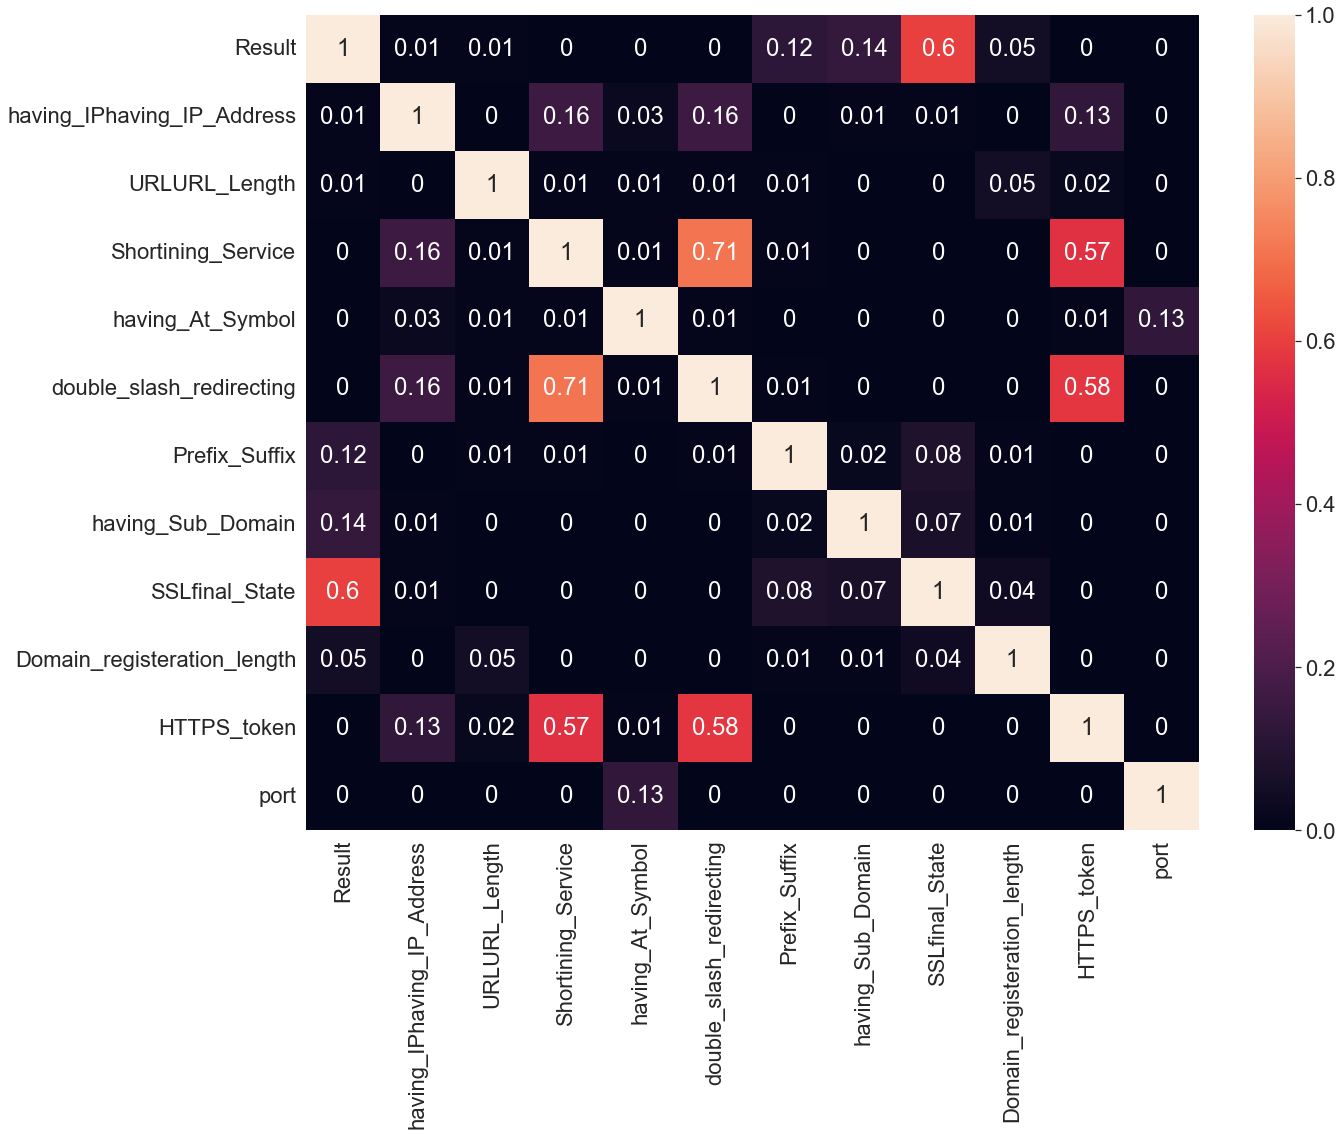

In [76]:
plt.figure(figsize=(20,15))
sb.set(font_scale=2)
sb.heatmap(url_cramers_results, annot=True, )

Website Cramer's V

In [65]:
rows= []

for var1 in data.columns:
  col = []
  for var2 in data.columns:
    cramers =cramers_V(data[var1], data[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
website_cramers_results = np.array(rows)
website_cramers_results = pd.DataFrame(website_cramers_results, columns = data.columns, 
                  index = data.columns)

<AxesSubplot: >

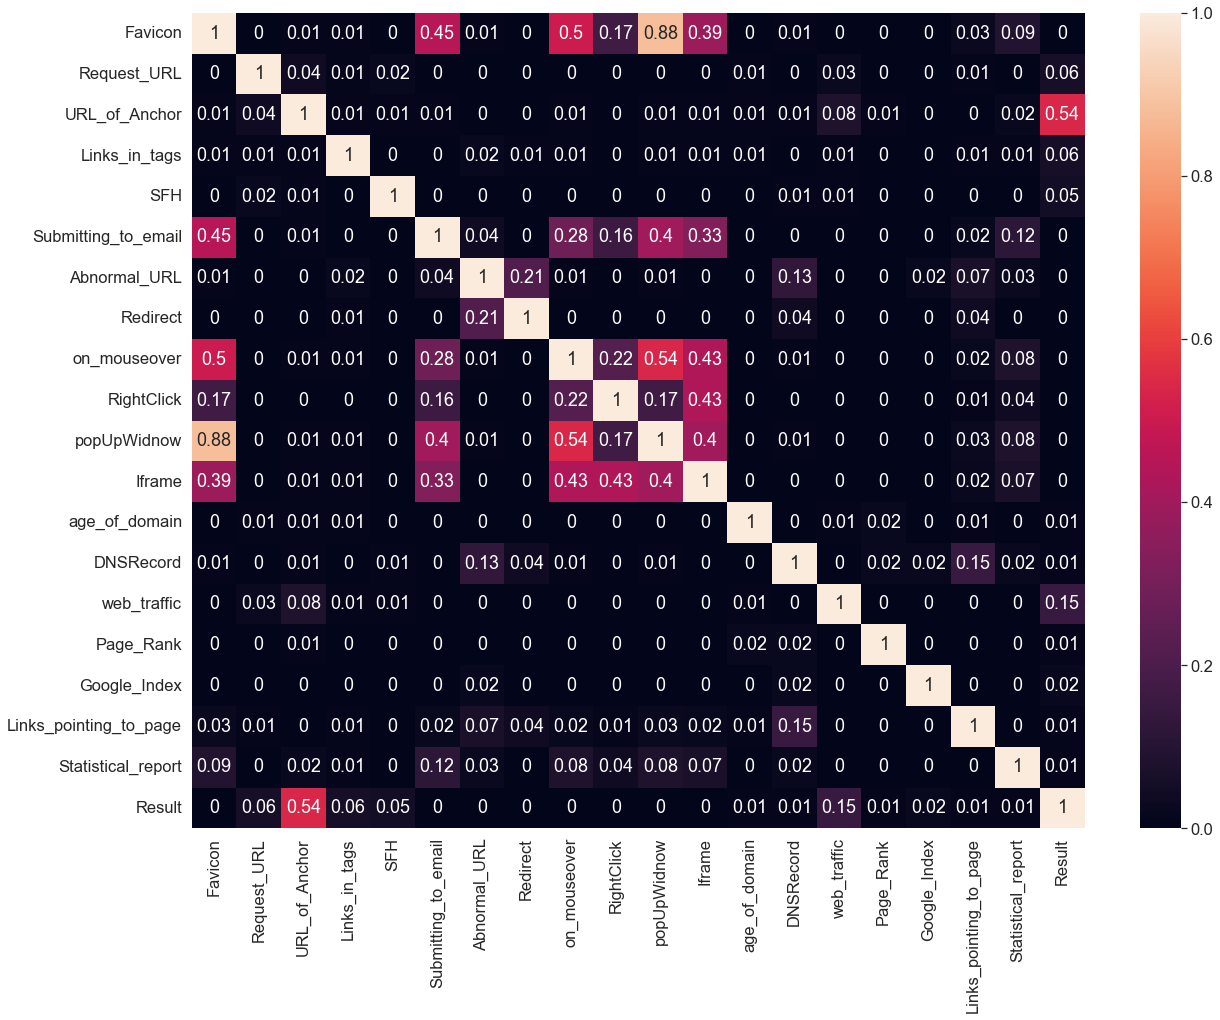

In [84]:
plt.figure(figsize=(20,15))
sb.set(font_scale=1.5)
sb.heatmap(website_cramers_results, annot=True)

In [39]:
data["Result"] = np.where(data["Result"] == 1, "Legitimate", "Phishing")
data["Favicon"] = np.where(data["Favicon"] == -1, "From external domain", "From current domain")
data["Request_URL"] = np.where(data["Request_URL"] == -1, ">= 61pct", data["Request_URL"])
data["Request_URL"] = np.where(data["Request_URL"] == str(0), ">= 22pct & < 61pct", data["Request_URL"])
data["Request_URL"] = np.where(data["Request_URL"] == str(1), "< 22pct", data["Request_URL"])
data["URL_of_Anchor"] = np.where(data["URL_of_Anchor"] == -1, "> 67pct", data["URL_of_Anchor"])
data["URL_of_Anchor"] = np.where(data["URL_of_Anchor"] == str(0), ">= 31pct & <= 67pct", data["URL_of_Anchor"])
data["URL_of_Anchor"] = np.where(data["URL_of_Anchor"] == str(1), "< 31pct", data["URL_of_Anchor"])
data["Links_in_tags"] = np.where(data["Links_in_tags"] == -1, "> 81pct", data["Links_in_tags"])
data["Links_in_tags"] = np.where(data["Links_in_tags"] == str(0), ">= 17pct & <= 81pct", data["Links_in_tags"])
data["Links_in_tags"] = np.where(data["Links_in_tags"] == str(1), "< 17pct", data["Links_in_tags"])
data["SFH"] = np.where(data["SFH"] == -1, "Empty", data["SFH"]) 
data["SFH"] = np.where(data["SFH"] == str(0), "External domain", data["SFH"])
data["SFH"] = np.where(data["SFH"] == str(1), "Current domain", data["SFH"])
data["Submitting_to_email"] = np.where(data["Submitting_to_email"] == -1, "Using mailto function", "Not using mailto function")
data["Abnormal_URL"] = np.where(data["Abnormal_URL"] == -1, "Host name not included", "Host name included")
data["Redirect"] = np.where(data["Redirect"] == -1, ">=4", data["Redirect"])
data["Redirect"] = np.where(data["Redirect"] == str(0), ">=2 and <4", data["Redirect"])
data["Redirect"] = np.where(data["Redirect"] == str(1), "<2", data["Redirect"])
data["on_mouseover"] = np.where(data["on_mouseover"] == -1, "Changes status bar", "Doesn't change status bar")
data["RightClick"] = np.where(data["RightClick"] == -1, "Disabled", "Enabled")
data["popUpWidnow"] = np.where(data["popUpWidnow"] == -1, "Contains input field", "No input field")
data["Iframe"] = np.where(data["Iframe"] == -1, "Using Iframe", "No Iframe")
data["age_of_domain"] = np.where(data["age_of_domain"] == -1, ">= 6 months", "< 6 months")
data["DNSRecord"] = np.where(data["DNSRecord"] == -1, "Has DNS record", "No DNS record")
data["web_traffic"] = np.where(data["web_traffic"] == -1, "No traffic record", data["web_traffic"])
data["web_traffic"] = np.where(data["web_traffic"] == str(0), "Traffic rank >100k", data["web_traffic"])
data["web_traffic"] = np.where(data["web_traffic"] == str(1), "Traffic rank <=100k", data["web_traffic"])
data["Page_Rank"] = np.where(data["Page_Rank"] == -1, "Rank < 0.2", "Rank >= 0.2")
data["Google_Index"] = np.where(data["Google_Index"] == -1, "Not indexed by Google", "Indexed by Google")
data["Links_pointing_to_page"] = np.where(data["Links_pointing_to_page"] == -1, "0 links", data["Links_pointing_to_page"])
data["Links_pointing_to_page"] = np.where(data["Links_pointing_to_page"] == str(0), "<= 2 links", data["Links_pointing_to_page"])
data["Links_pointing_to_page"] = np.where(data["Links_pointing_to_page"] == str(1), "> 2 links", data["Links_pointing_to_page"])
data["Statistical_report"] = np.where(data["Statistical_report"] == -1, "In reports", "Not in reports")

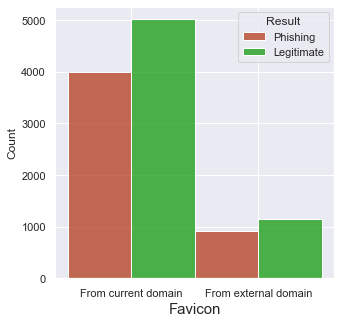

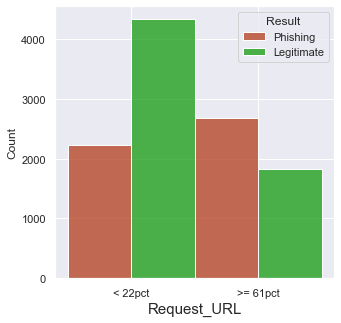

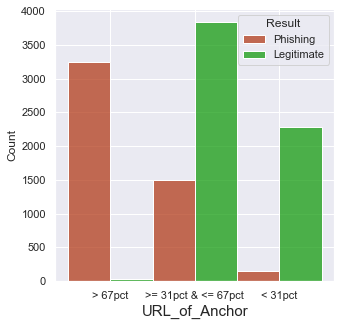

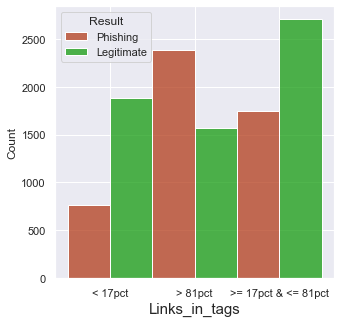

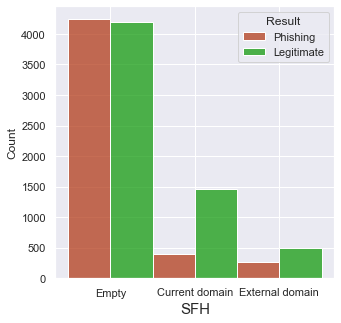

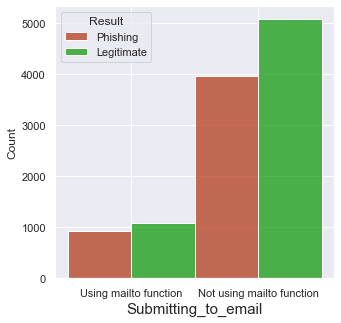

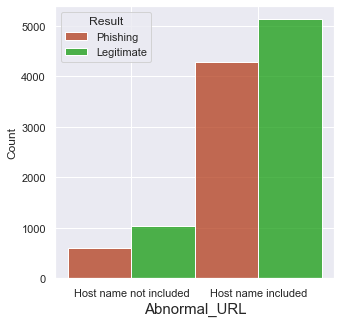

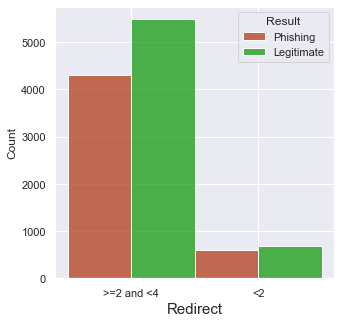

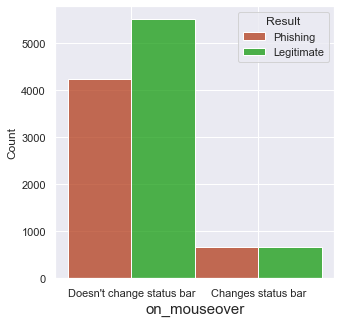

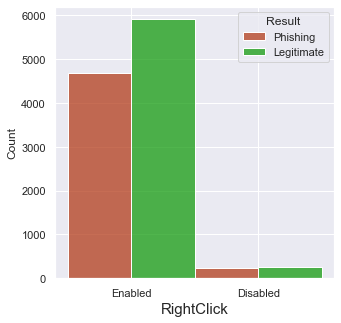

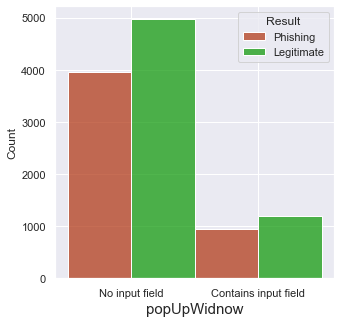

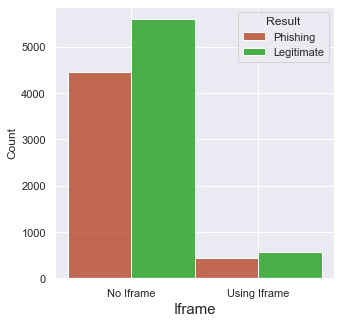

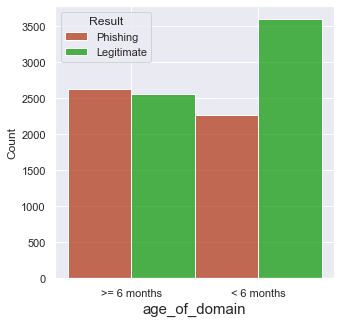

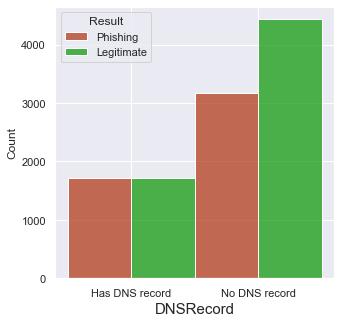

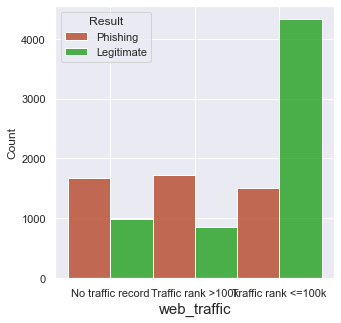

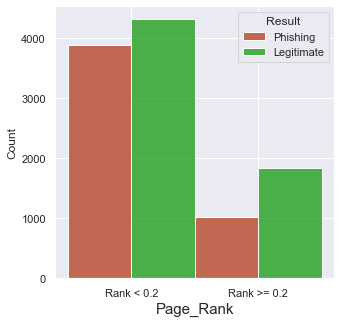

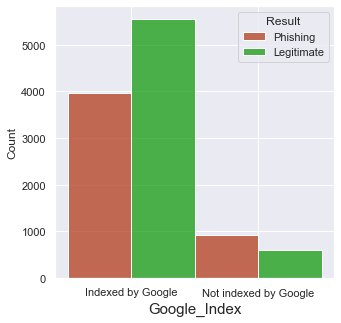

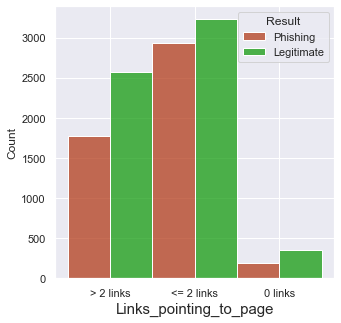

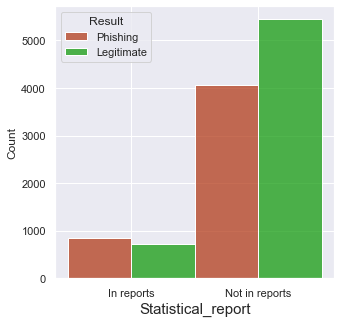

In [40]:
sb.set_theme()
for col in ['Favicon', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']:
    plt.figure(figsize=(5,5))
    b = sb.histplot(x=col, multiple="dodge",hue="Result", stat="count", data=data, palette=["#b33c1b", "#169c11"]) 
    b.set_xlabel(xlabel=col,fontsize=15)